### Phase 3 
##### April 10th, 2022
#### Helen (Zhaolin) Li, Amaris (Jiayue) Han, Pie (Arisara) Vichitchoti, and Aaron (Yitian) Liang 

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### RandomForestClassifier for Cardio dataset 

In [2]:
# Load the cardio data
cvd_df = pd.read_csv('new_cardio_data.csv')
cvd_df.head(10)

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bp_cate
0,1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,Hypertension stage 2
1,2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,Hypertension stage 1
2,3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,Hypertension stage 2
3,4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,Normal
4,5,8,60.038356,1,151,67.0,120,80,2,2,0,0,0,0,Normal
5,6,9,60.583562,1,157,93.0,130,80,3,1,0,0,1,0,Hypertension stage 1
6,7,12,61.873973,2,178,95.0,130,90,3,3,0,0,1,1,Hypertension stage 1
7,8,13,48.405479,1,158,71.0,110,70,1,1,0,0,1,0,Normal
8,9,14,54.339726,1,164,68.0,110,60,1,1,0,0,0,0,Normal
9,10,15,61.726027,1,169,80.0,120,80,1,1,0,0,1,0,Normal


In [3]:
# Encode the bp_cate from categorical data to numeric data 
cvd_df["bp_cate"] = cvd_df["bp_cate"].astype('category')
cvd_df["bp_level"] = cvd_df["bp_cate"].cat.rename_categories({"Hypotension": 0, "Normal": 1, 
                                               "Elevated": 2, "Hypertension stage 1": 3,
                                                "Hypertension stage 2": 4})

In [4]:
# Drop a the first, the ap_hi, ap_lo, and bp_cate columns
cvd= cvd_df.iloc[: , 1:].drop(['ap_hi', 'ap_lo','bp_cate'], axis = 1)

In [5]:
# Convert the categorical type of bp_level back to numerical 
cvd["bp_level"]  = cvd["bp_level"].astype(int)

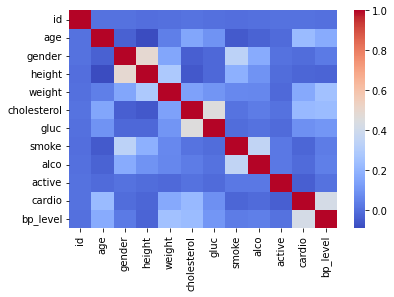

In [6]:
# Visualize the correlations between all numerical data 
plt.figure()
sns.heatmap(cvd.corr(), cmap='coolwarm')
# sns.catplot(x="cardio", y="age", kind="swarm", data=cvd)
plt.show()

In [7]:
# Split the data into training and test sets
X = cvd[['age', 'gender','gluc', 'bp_level', 'weight','cholesterol']]
y = cvd["cardio"]


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.33,
                                                    random_state = 7,
                                                    stratify = y
                                                   )

### RandomForestClassifier - CVD dataset

In [8]:
# Build the classifier
rf = RandomForestClassifier(criterion='entropy', n_estimators = 100, random_state = 7)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

In [9]:
# Predict the labels for the test set
y_pred   = rf.predict(X_test)

# Prediction accuracy
print('The accuracy of the model is: {}'.format(rf.score(X_test, y_test)))

The accuracy of the model is: 0.6509358926772363


In [10]:
# Get the classification report for the model 
y_pred = rf.predict(X_test)

target_names = ["CVD", "no CVD"]
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

         CVD       0.66      0.64      0.65      9503
      no CVD       0.64      0.66      0.65      9356

    accuracy                           0.65     18859
   macro avg       0.65      0.65      0.65     18859
weighted avg       0.65      0.65      0.65     18859



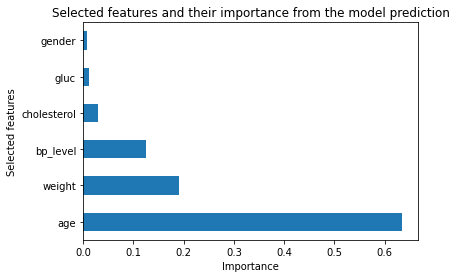

In [11]:
# Visualize the most important features that help predict the presence of CVDs. 
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.title("Selected features and their importance from the model prediction")
plt.xlabel("Importance")
plt.ylabel("Selected features")
plt.show()

### RandomForestRegression - CVD dataset

In [12]:
# Build the regressor
rf = RandomForestRegressor(n_estimators = 500, random_state=7)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=7)

In [13]:
# Predict the labels for the test set
y_pred   = rf.predict(X_test)

print('The probability of having cardio is: {}'.format(y_pred))

The probability of having cardio is: [0.622 0.964 0.112 ... 0.274 0.924 0.278]


In [14]:
# Evaluate the Predictions
mse = mean_squared_error(y_test, y_pred)

print('The mse of the model is: {}'.format(mse))

The mse of the model is: 0.2260579009509032


In [15]:
# Add corresponding CVD predictions to the X_test dataframe 
pred_y = list(y_pred)
X_test["P(cardio)"] = pred_y

In [16]:
# Merge the original cvd dataset and the X_test so we can locate the patient id and corresponding CVD possibility 
merged = pd.merge(left=cvd_df, left_index=True,
                  right=X_test, right_index=True,
                  how='inner', suffixes=('', '_remove'))
# remove the duplicate columns
merged.drop([i for i in merged.columns if 'remove' in i],
               axis=1, inplace=True)

# remove the "Unnamed:0" column
merged.iloc[: , 1:]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bp_cate,bp_level,P(cardio)
0,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,Hypertension stage 2,4,0.780000
10,16,51.547945,2,173,60.0,120,80,1,1,0,0,1,0,Normal,1,0.371900
11,18,40.523288,2,165,60.0,120,80,1,1,0,0,0,0,Normal,1,0.056000
15,25,58.345205,1,170,75.0,130,70,1,1,0,0,0,0,Hypertension stage 1,3,0.356000
19,31,58.665753,1,157,69.0,130,80,1,1,0,0,1,0,Hypertension stage 1,3,0.274000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57131,99973,51.893151,1,153,86.0,130,90,1,2,0,0,1,1,Hypertension stage 1,3,0.316000
57132,99974,53.841096,1,165,72.0,120,80,1,1,0,0,1,0,Normal,1,0.032000
57137,99981,60.213699,1,160,59.0,110,70,1,1,0,0,1,0,Normal,1,0.341333
57142,99993,52.712329,2,168,76.0,120,80,1,1,1,0,1,0,Normal,1,0.056000


### K-fold Cross Validation - CVD dataset 

In [17]:
# Initiate K-fold CV 
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# Evaluate model
scores = cross_val_score(RandomForestClassifier(), X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(" The K-fold Cross-Validation model has a %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

 The K-fold Cross-Validation model has a 0.65 accuracy with a standard deviation of 0.01


### SVM model (optional) - CVD dataset

>Summary:

### Stroke Dataset

In [22]:
# import EDA stroke data
stroke_df = pd.read_csv('new_stroke_data.csv')
stroke_df.head(10)

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,11,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


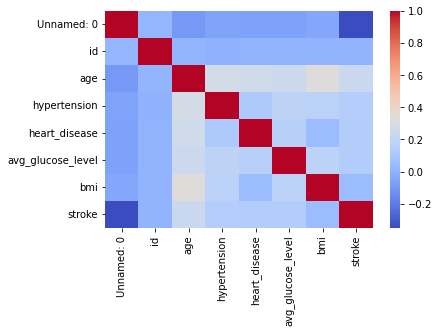

In [41]:
# Visualize the correlations between all numerical data 
plt.figure()
sns.heatmap(stroke_df.corr(), cmap='coolwarm')
plt.show()

In [25]:
# Split the data into training and test sets
X = stroke_df[['age', 'hypertension','heart_disease', 'avg_glucose_level']]
y = stroke_df["stroke"]


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.33,
                                                    random_state = 7,
                                                    stratify = y
                                                   )

### RandomForestClassifier - stroke dataset

In [43]:
# Build the classifier
rf = RandomForestClassifier(criterion='entropy', n_estimators = 100, random_state = 7)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

In [44]:
# Predict the labels for the test set
y_pred   = rf.predict(X_test)

# Prediction accuracy
print('The accuracy of the model is: {}'.format(rf.score(X_test, y_test)))

The accuracy of the model is: 0.9487654320987654


In [45]:
# Get the classification report for the model 
y_pred = rf.predict(X_test)

target_names = ['Non Stroke','Stroke']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

  Non Stroke       0.96      0.99      0.97      1551
      Stroke       0.06      0.01      0.02        69

    accuracy                           0.95      1620
   macro avg       0.51      0.50      0.50      1620
weighted avg       0.92      0.95      0.93      1620



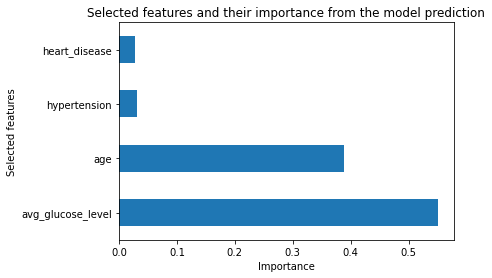

In [46]:
# Visualize the most important features that help predict the presence of stroke. 
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.title("Selected features and their importance from the model prediction")
plt.xlabel("Importance")
plt.ylabel("Selected features")
plt.show()

### RandomForestRegression - stroke dataset

In [47]:
# Build the regressor
rf = RandomForestRegressor(n_estimators = 500, random_state=7)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=7)

In [48]:
# Predict the labels for the test set
y_pred   = rf.predict(X_test)

print('The probability of having stroke is: {}'.format(y_pred))

The probability of having stroke is: [0. 0. 0. ... 0. 0. 0.]


In [49]:
# Evaluate the Predictions
mse = mean_squared_error(y_test, y_pred)

print('The mse of the model is: {}'.format(mse))

The mse of the model is: 0.046679814814814806


### K-fold Cross Validation - stroke dataset 

In [50]:
# Initiate K-fold CV 
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# Evaluate model
scores = cross_val_score(RandomForestClassifier(), X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(" The K-fold Cross-Validation model has a %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

 The K-fold Cross-Validation model has a 0.95 accuracy with a standard deviation of 0.01
